In [22]:
import pandas as pd

pbp_data = pd.read_csv('data/pbp/2019.csv', sep=",", encoding='iso-8859-1')
pbp_data = pbp_data.append(pd.read_csv('data/pbp/2018.csv', sep=",", encoding='iso-8859-1'))
pbp_data = pbp_data.append(pd.read_csv('data/pbp/2017.csv', sep=",", encoding='iso-8859-1'))
pbp_data = pbp_data.append(pd.read_csv('data/pbp/2016.csv', sep=",", encoding='iso-8859-1'))
pbp_data.id.nunique()

608262

In [23]:
pbp_data.head()

,id,offense,offense_conference,defense,defense_conference,home,away,offense_score,defense_score,drive_id,period,clock.minutes,clock.seconds,yard_line,down,distance,yards_gained,play_type,play_text,ppa
0,401110720101858401,Alabama,SEC,Duke,ACC,Alabama,Duke,0,0,4011107201,1,14,15,23,2,9,2,Pass Reception,Tua Tagovailoa pass complete to Jerome Ford fo...,-0.227265
1,401110720101866901,Alabama,SEC,Duke,ACC,Alabama,Duke,0,0,4011107201,1,13,30,25,3,7,-6,Sack,Tua Tagovailoa sacked by Koby Quansah for a lo...,-0.337948
2,401110720101855301,Alabama,SEC,Duke,ACC,Alabama,Duke,0,0,4011107201,1,14,46,22,1,10,1,Rush,Jerome Ford run for 1 yd to the Alab 23,-0.514220
3,401110720101874201,Alabama,SEC,Duke,ACC,Alabama,Duke,0,0,4011107201,1,12,57,19,4,13,3,Punt,"Will Reichard punt for 39 yds , Josh Blackwell...",NaN
4,401110720101849902,Duke,ACC,Alabama,SEC,Alabama,Duke,0,0,4011107201,1,15,0,65,1,10,22,Kickoff,"AJ Reed kickoff for 65 yds , Henry Ruggs III r...",NaN


In [24]:
non_garbage_time_data = pbp_data[
    pbp_data.down != 0
]
non_garbage_time_data.id.nunique()

595201

In [25]:
# garbage_time_data = non_garbage_time_data[
#     ((abs(non_garbage_time_data.offense_score - non_garbage_time_data.defense_score) >= 38) & (non_garbage_time_data.period == 2))
#     | ((abs(non_garbage_time_data.offense_score - non_garbage_time_data.defense_score) >= 28) & (non_garbage_time_data.period == 3))
#     | ((abs(non_garbage_time_data.offense_score - non_garbage_time_data.defense_score) >= 22) & (non_garbage_time_data.period == 4))
# ]

# print(non_garbage_time_data.id.nunique())
# print(garbage_time_data.id.nunique())

# non_garbage_time_data.drop(garbage_time_data.index, inplace=True)
# print(non_garbage_time_data.id.nunique())

In [26]:
downs = [1, 2, 3, 4]
for d in downs:
    intermed = non_garbage_time_data[
        non_garbage_time_data.down == d
    ]
    print(f"number of instances of down {d}: {intermed.id.nunique()} ({100 * intermed.id.nunique() / non_garbage_time_data.id.nunique()}%)")

number of instances of down 1: 250883 (42.15097084850328%)
number of instances of down 2: 168905 (28.37780850502603%)
number of instances of down 3: 111201 (18.682932320342204%)
number of instances of down 4: 64207 (10.787448273776421%)


In [27]:
drive_data = pd.read_csv('data/drives/2019.csv', sep=",", encoding='iso-8859-1')
drive_data = drive_data.append(pd.read_csv('data/drives/2018.csv', sep=",", encoding='iso-8859-1'))
drive_data = drive_data.append(pd.read_csv('data/drives/2017.csv', sep=",", encoding='iso-8859-1'))
drive_data = drive_data.append(pd.read_csv('data/drives/2016.csv', sep=",", encoding='iso-8859-1'))
drive_data.head()

,offense,offense_conference,defense,defense_conference,game_id,id,scoring,start_period,start_yardline,start_time.minutes,start_time.seconds,end_period,end_yardline,end_time.minutes,end_time.seconds,elapsed.minutes,elapsed.seconds,plays,yards,drive_result
0,Alabama,SEC,Duke,ACC,401110720,4011107201,False,1,22,15,0,1,19,12,57,2.0,3.0,3,-3,PUNT
1,Duke,ACC,Alabama,SEC,401110720,4011107202,False,1,55,12,57,1,52,11,49,1.0,8.0,3,3,PUNT
2,Alabama,SEC,Duke,ACC,401110720,4011107203,False,1,17,11,49,1,23,11,24,NaN,25.0,2,9,FUMBLE
3,Duke,ACC,Alabama,SEC,401110720,4011107204,False,1,26,11,24,1,7,8,28,2.0,56.0,7,19,DOWNS
4,Alabama,SEC,Duke,ACC,401110720,4011107205,False,1,7,8,28,1,69,3,25,5.0,3.0,12,62,MISSED FG


In [28]:
# drive_data.drive_result.value_counts(normalize=True)
# cleaned_yards = drive_data.start_yardline.apply(lambda x: x % 50)
drive_data.start_yardline.value_counts(bins=[0,10,20,30,40,50])

(20.0, 30.0]      16380
(30.0, 40.0]       8451
(10.0, 20.0]       8193
(40.0, 50.0]       5367
(-0.001, 10.0]     3874
Name: start_yardline, dtype: int64

In [29]:
new_df = pd.merge(drive_data,
                 non_garbage_time_data[['drive_id','away','home']],
                 left_on='id',
                 right_on='drive_id')

new_df.loc[
    new_df.offense == new_df.away, ['start_yardline']
] = 100 - new_df.start_yardline
new_df.loc[
    new_df.offense == new_df.away, ['end_yardline']
] = 100 - new_df.end_yardline
new_df.head()

,offense,offense_conference,defense,defense_conference,game_id,id,scoring,start_period,start_yardline,start_time.minutes,...,end_time.minutes,end_time.seconds,elapsed.minutes,elapsed.seconds,plays,yards,drive_result,drive_id,away,home
0,Alabama,SEC,Duke,ACC,401110720,4011107201,False,1,22,15,...,12,57,2.0,3.0,3,-3,PUNT,4011107201,Duke,Alabama
1,Alabama,SEC,Duke,ACC,401110720,4011107201,False,1,22,15,...,12,57,2.0,3.0,3,-3,PUNT,4011107201,Duke,Alabama
2,Alabama,SEC,Duke,ACC,401110720,4011107201,False,1,22,15,...,12,57,2.0,3.0,3,-3,PUNT,4011107201,Duke,Alabama
3,Alabama,SEC,Duke,ACC,401110720,4011107201,False,1,22,15,...,12,57,2.0,3.0,3,-3,PUNT,4011107201,Duke,Alabama
4,Alabama,SEC,Duke,ACC,401110720,4011107201,False,1,22,15,...,12,57,2.0,3.0,3,-3,PUNT,4011107201,Duke,Alabama


Text(0, 0.5, 'Density')

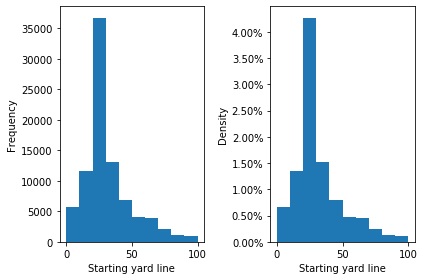

In [30]:
%matplotlib inline
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt

coll_df = new_df.drop_duplicates(subset='id')
coll_df.head()

fig, axs = plt.subplots(1, 2, sharey=False, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(coll_df.start_yardline, bins=10)

# # We can also normalize our inputs by the total number of counts
axs[1].hist(coll_df.start_yardline, bins=10, density=True)

# # Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))

axs[0].set_xlabel('Starting yard line')
axs[0].set_ylabel('Frequency')
axs[1].set_xlabel('Starting yard line')
axs[1].set_ylabel('Density')

In [31]:
coll_df.start_yardline.value_counts(bins=[0,10,20,30,40,50,60,70,80,90,100])

(20.0, 30.0]      33579
(10.0, 20.0]      15490
(30.0, 40.0]      12147
(-0.001, 10.0]     6884
(40.0, 50.0]       6307
(50.0, 60.0]       3880
(60.0, 70.0]       3787
(70.0, 80.0]       2064
(80.0, 90.0]        958
(90.0, 100.0]       853
Name: start_yardline, dtype: int64

In [32]:
coll_df.drive_result.value_counts()

PUNT                             32647
TD                               22808
FG                                7111
INT                               4973
DOWNS                             4799
FUMBLE                            3887
END OF HALF                       2567
END OF GAME                       2560
MISSED FG                         2532
INT TD                             587
Uncategorized                      510
FUMBLE TD                          250
SF                                 210
PUNT RETURN TD                     143
PUNT TD                            130
END OF 4TH QUARTER                 102
FUMBLE RETURN TD                    74
MISSED FG TD                        22
KICKOFF                             18
POSSESSION (FOR OT DRIVES)           9
DOWNS TD                             6
END OF GAME TD                       2
POSSESSION (FOR OT DRIVES) TD        1
END OF HALF TD                       1
Name: drive_result, dtype: int64

In [33]:
scoring_drives = coll_df[
    (coll_df.drive_result == 'TD')
    | (coll_df.drive_result == 'FG')
    | (coll_df.drive_result == 'SF')
    | (coll_df.drive_result == 'FUMBLE TD')
    | (coll_df.drive_result == 'INT TD')
    | (coll_df.drive_result == 'DOWNS TD')
]
scoring_drives.id.nunique()

30972

In [34]:
cust_bins = np.linspace(1,100,100)
cust_bins

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

In [35]:
# Probability of an offensive TD drive given starting yard line within one of these bins
def prob(prb1, prb2):
    return prb1 / prb2

td = coll_df[
    (coll_df.drive_result == 'TD')
].start_yardline.value_counts(bins=cust_bins)
td_vars = pd.DataFrame({'yardline_bin':td.index, 'td_frequency':td.values})
td_vars['td_density'] = td_vars.td_frequency / coll_df.id.nunique()
td_vars

,yardline_bin,td_frequency,td_density
0,"(24.0, 25.0]",4229,0.049204
1,"(19.0, 20.0]",1147,0.013345
2,"(34.0, 35.0]",639,0.007435
3,"(29.0, 30.0]",514,0.005980
4,"(64.0, 65.0]",453,0.005271
...,...,...,...
94,"(89.0, 90.0]",42,0.000489
95,"(82.0, 83.0]",42,0.000489
96,"(88.0, 89.0]",39,0.000454
97,"(91.0, 92.0]",36,0.000419


In [36]:
# Probability of an offensive FG drive given starting yard line within one of these bins
fg = coll_df[
    (coll_df.drive_result == 'FG')
].start_yardline.value_counts(bins=cust_bins)
fg_vars = pd.DataFrame({'yardline_bin':fg.index, 'fg_frequency':fg.values})
fg_vars['fg_density'] = fg_vars.fg_frequency / coll_df.id.nunique()
fg_vars

,yardline_bin,fg_frequency,fg_density
0,"(24.0, 25.0]",1293,0.015044
1,"(19.0, 20.0]",316,0.003677
2,"(34.0, 35.0]",221,0.002571
3,"(29.0, 30.0]",156,0.001815
4,"(64.0, 65.0]",150,0.001745
...,...,...,...
94,"(96.0, 97.0]",8,0.000093
95,"(97.0, 98.0]",8,0.000093
96,"(94.0, 95.0]",6,0.000070
97,"(99.0, 100.0]",3,0.000035


In [37]:
def_scores = coll_df[
    (coll_df.drive_result == 'FUMBLE TD')
    | (coll_df.drive_result == 'INT TD')
    | (coll_df.drive_result == 'DOWNS TD')
].start_yardline.value_counts(bins=cust_bins)
def_vars = pd.DataFrame({'yardline_bin':def_scores.index, 'def_frequency':def_scores.values})
def_vars['def_density'] = def_vars.def_frequency / coll_df.id.nunique()
def_vars

,yardline_bin,def_frequency,def_density
0,"(24.0, 25.0]",221,0.002571
1,"(19.0, 20.0]",51,0.000593
2,"(0.999, 2.0]",26,0.000303
3,"(23.0, 24.0]",21,0.000244
4,"(64.0, 65.0]",20,0.000233
...,...,...,...
94,"(60.0, 61.0]",0,0.000000
95,"(73.0, 74.0]",0,0.000000
96,"(72.0, 73.0]",0,0.000000
97,"(62.0, 63.0]",0,0.000000


In [38]:
safety_scores = coll_df[
    (coll_df.drive_result == 'SF')
].start_yardline.value_counts(bins=cust_bins)
sf_vars = pd.DataFrame({'yardline_bin':safety_scores.index, 'sf_frequency':safety_scores.values})
sf_vars['sf_density'] = sf_vars.sf_frequency / coll_df.id.nunique()
sf_vars

,yardline_bin,sf_frequency,sf_density
0,"(0.999, 2.0]",61,0.000710
1,"(24.0, 25.0]",14,0.000163
2,"(3.0, 4.0]",13,0.000151
3,"(2.0, 3.0]",12,0.000140
4,"(6.0, 7.0]",12,0.000140
...,...,...,...
94,"(69.0, 70.0]",0,0.000000
95,"(70.0, 71.0]",0,0.000000
96,"(71.0, 72.0]",0,0.000000
97,"(72.0, 73.0]",0,0.000000


In [39]:
combined = pd.merge(td_vars, fg_vars, on='yardline_bin')
combined = pd.merge(combined, def_vars, on='yardline_bin')
combined = pd.merge(combined, sf_vars, on='yardline_bin')
combined
# combined now contains % of scoring AND position

,yardline_bin,td_frequency,td_density,fg_frequency,fg_density,def_frequency,def_density,sf_frequency,sf_density
0,"(24.0, 25.0]",4229,0.049204,1293,0.015044,221,0.002571,14,0.000163
1,"(19.0, 20.0]",1147,0.013345,316,0.003677,51,0.000593,5,0.000058
2,"(34.0, 35.0]",639,0.007435,221,0.002571,12,0.000140,0,0.000000
3,"(29.0, 30.0]",514,0.005980,156,0.001815,16,0.000186,0,0.000000
4,"(64.0, 65.0]",453,0.005271,150,0.001745,20,0.000233,0,0.000000
...,...,...,...,...,...,...,...,...,...
94,"(89.0, 90.0]",42,0.000489,19,0.000221,0,0.000000,0,0.000000
95,"(82.0, 83.0]",42,0.000489,19,0.000221,0,0.000000,0,0.000000
96,"(88.0, 89.0]",39,0.000454,19,0.000221,0,0.000000,0,0.000000
97,"(91.0, 92.0]",36,0.000419,12,0.000140,1,0.000012,0,0.000000


In [40]:
# generating prob of a specific yard line bin
pos = coll_df.start_yardline.value_counts(bins=cust_bins, normalize=True)
p_pos = pd.DataFrame({'yardline_bin':pos.index, 'yardline_density':pos.values})

p_pos

,yardline_bin,yardline_density
0,"(24.0, 25.0]",0.219549
1,"(19.0, 20.0]",0.059070
2,"(34.0, 35.0]",0.028145
3,"(29.0, 30.0]",0.022374
4,"(64.0, 65.0]",0.020314
...,...,...
94,"(96.0, 97.0]",0.000721
95,"(91.0, 92.0]",0.000652
96,"(97.0, 98.0]",0.000617
97,"(98.0, 99.0]",0.000617


In [41]:
combined = pd.merge(combined, p_pos, on='yardline_bin')
combined

,yardline_bin,td_frequency,td_density,fg_frequency,fg_density,def_frequency,def_density,sf_frequency,sf_density,yardline_density
0,"(24.0, 25.0]",4229,0.049204,1293,0.015044,221,0.002571,14,0.000163,0.219549
1,"(19.0, 20.0]",1147,0.013345,316,0.003677,51,0.000593,5,0.000058,0.059070
2,"(34.0, 35.0]",639,0.007435,221,0.002571,12,0.000140,0,0.000000,0.028145
3,"(29.0, 30.0]",514,0.005980,156,0.001815,16,0.000186,0,0.000000,0.022374
4,"(64.0, 65.0]",453,0.005271,150,0.001745,20,0.000233,0,0.000000,0.020314
...,...,...,...,...,...,...,...,...,...,...
94,"(89.0, 90.0]",42,0.000489,19,0.000221,0,0.000000,0,0.000000,0.000838
95,"(82.0, 83.0]",42,0.000489,19,0.000221,0,0.000000,0,0.000000,0.001094
96,"(88.0, 89.0]",39,0.000454,19,0.000221,0,0.000000,0,0.000000,0.000826
97,"(91.0, 92.0]",36,0.000419,12,0.000140,1,0.000012,0,0.000000,0.000652


In [42]:
combined["p_td_given_pos"] = combined.apply(lambda x: x.td_density/x.yardline_density, axis=1)
combined["p_fg_given_pos"] = combined.apply(lambda x: x['fg_density']/x['yardline_density'], axis=1)
combined["p_def_given_pos"] = combined.apply(lambda x: x['def_density']/x['yardline_density'], axis=1)
combined["p_sf_given_pos"] = combined.apply(lambda x: x['sf_density']/x['yardline_density'], axis=1)
combined.head()

,yardline_bin,td_frequency,td_density,fg_frequency,fg_density,def_frequency,def_density,sf_frequency,sf_density,yardline_density,p_td_given_pos,p_fg_given_pos,p_def_given_pos,p_sf_given_pos
0,"(24.0, 25.0]",4229,0.049204,1293,0.015044,221,0.002571,14,0.000163,0.219549,0.224112,0.068521,0.011712,0.000742
1,"(19.0, 20.0]",1147,0.013345,316,0.003677,51,0.000593,5,0.000058,0.059070,0.225921,0.062241,0.010045,0.000985
2,"(34.0, 35.0]",639,0.007435,221,0.002571,12,0.000140,0,0.000000,0.028145,0.264159,0.091360,0.004961,0.000000
3,"(29.0, 30.0]",514,0.005980,156,0.001815,16,0.000186,0,0.000000,0.022374,0.267291,0.081123,0.008320,0.000000
4,"(64.0, 65.0]",453,0.005271,150,0.001745,20,0.000233,0,0.000000,0.020314,0.259450,0.085911,0.011455,0.000000


In [43]:
def weighted_epa(row):
    return 7 * row.p_td_given_pos + 3 * row.p_fg_given_pos - 2 * row.p_sf_given_pos #- 7 * row.p_def_given_pos
0
combined['ep'] = combined.apply(lambda x: weighted_epa(x), axis=1)
combined['yardline'] = combined.yardline_bin.apply(lambda x: x.left)
combined

,yardline_bin,td_frequency,td_density,fg_frequency,fg_density,def_frequency,def_density,sf_frequency,sf_density,yardline_density,p_td_given_pos,p_fg_given_pos,p_def_given_pos,p_sf_given_pos,ep,yardline
0,"(24.0, 25.0]",4229,0.049204,1293,0.015044,221,0.002571,14,0.000163,0.219549,0.224112,0.068521,0.011712,0.000742,1.772867,24.0
1,"(19.0, 20.0]",1147,0.013345,316,0.003677,51,0.000593,5,0.000058,0.059070,0.225921,0.062241,0.010045,0.000985,1.766201,19.0
2,"(34.0, 35.0]",639,0.007435,221,0.002571,12,0.000140,0,0.000000,0.028145,0.264159,0.091360,0.004961,0.000000,2.123191,34.0
3,"(29.0, 30.0]",514,0.005980,156,0.001815,16,0.000186,0,0.000000,0.022374,0.267291,0.081123,0.008320,0.000000,2.114405,29.0
4,"(64.0, 65.0]",453,0.005271,150,0.001745,20,0.000233,0,0.000000,0.020314,0.259450,0.085911,0.011455,0.000000,2.073883,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,"(89.0, 90.0]",42,0.000489,19,0.000221,0,0.000000,0,0.000000,0.000838,0.583333,0.263889,0.000000,0.000000,4.875000,89.0
95,"(82.0, 83.0]",42,0.000489,19,0.000221,0,0.000000,0,0.000000,0.001094,0.446809,0.202128,0.000000,0.000000,3.734043,82.0
96,"(88.0, 89.0]",39,0.000454,19,0.000221,0,0.000000,0,0.000000,0.000826,0.549296,0.267606,0.000000,0.000000,4.647887,88.0
97,"(91.0, 92.0]",36,0.000419,12,0.000140,1,0.000012,0,0.000000,0.000652,0.642857,0.214286,0.017857,0.000000,5.142857,91.0


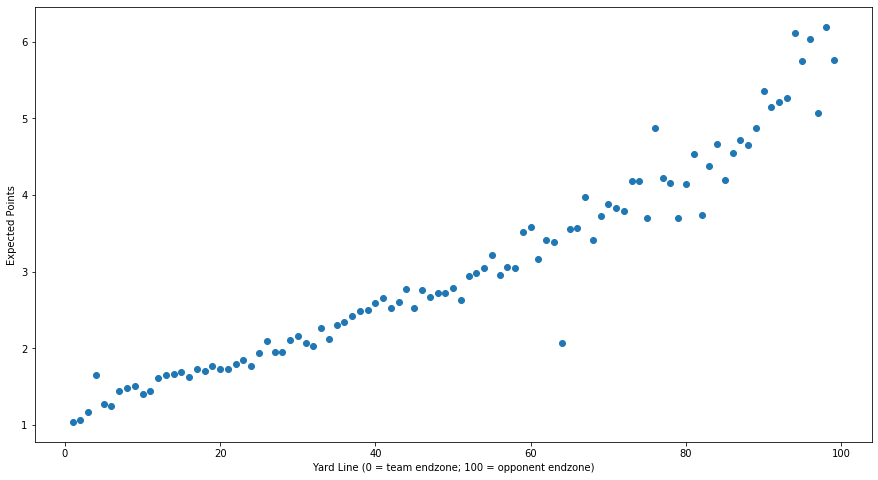

In [44]:
f, ax = plt.subplots(figsize=(15,8))
combined.sort_values(by=["yardline"])
ax.scatter(combined.yardline, combined.ep);
ax.set_xlabel("Yard Line (0 = team endzone; 100 = opponent endzone)")
ax.set_ylabel("Expected Points");

In [45]:

msk = np.random.rand(len(combined)) < 0.80
train_data = combined[msk]
test_data = combined[~msk]
train_data.head()

,yardline_bin,td_frequency,td_density,fg_frequency,fg_density,def_frequency,def_density,sf_frequency,sf_density,yardline_density,p_td_given_pos,p_fg_given_pos,p_def_given_pos,p_sf_given_pos,ep,yardline
1,"(19.0, 20.0]",1147,0.013345,316,0.003677,51,0.000593,5,0.000058,0.059070,0.225921,0.062241,0.010045,0.000985,1.766201,19.0
2,"(34.0, 35.0]",639,0.007435,221,0.002571,12,0.000140,0,0.000000,0.028145,0.264159,0.091360,0.004961,0.000000,2.123191,34.0
3,"(29.0, 30.0]",514,0.005980,156,0.001815,16,0.000186,0,0.000000,0.022374,0.267291,0.081123,0.008320,0.000000,2.114405,29.0
4,"(64.0, 65.0]",453,0.005271,150,0.001745,20,0.000233,0,0.000000,0.020314,0.259450,0.085911,0.011455,0.000000,2.073883,64.0
5,"(26.0, 27.0]",423,0.004922,124,0.001443,16,0.000186,1,0.000012,0.018534,0.265537,0.077841,0.010044,0.000628,2.091023,26.0


In [46]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_data.yardline[:, np.newaxis], train_data.ep)
xfit = np.linspace(0, len(train_data), len(train_data))
yfit = model.predict(xfit[:, np.newaxis])
print(f'Linear Regression: y = {model.coef_[0]:.5f}x + {model.intercept_:.5f}')
ax.plot(xfit, yfit, color='red', label='Linear Regression');

Linear Regression: y = 0.04443x + 0.80711


In [47]:
# Polynomial Regression Model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
def poly_regress(degree, plot, color):
    poly = PolynomialFeatures(degree=degree)
    X_ = poly.fit_transform(train_data.yardline[:, np.newaxis])
    X_test_ = poly.fit_transform(xfit[:, np.newaxis])

    lg = LinearRegression()

    # Fit
    lg.fit(X_, train_data.ep)

    # Obtain coefficients
    # lg.coef_

    quady_fit = lg.predict(X_test_)

    ax.plot(xfit, quady_fit, color=color, label=f'Poly Regression (degree: {degree})')
    print(f'Regression Coefficients: {lg.coef_}')
    error = mean_absolute_error(train_data.ep[:, np.newaxis], quady_fit)
    print(f'MAE: {error:.4f}')
    return lg

quad1 = poly_regress(2, ax, 'g')
print(f'Polynomial Regression (with degree 2): y = {quad1.coef_[0]:.5f}x^3 + {quad1.coef_[1]:.5f}x^2 + {quad1.coef_[2]:.5f}x + {quad1.intercept_:.5f}')

quad2 = poly_regress(3, ax, 'b')
print(f'Polynomial Regression (with degree 3): y = {quad2.coef_[0]:.7f}x^4 + {quad2.coef_[1]:.7f}x^3 + {quad2.coef_[2]:.5f}x^2 + {quad2.coef_[3]:.7f}x + {quad2.intercept_:.7f}')

quad3 = poly_regress(4, ax, 'y')
print(f'Polynomial Regression (with degree 4): y = {quad3.coef_[0]:.7f}x^5 + {quad3.coef_[1]:.7f}x^4 + {quad3.coef_[2]:.7f}x^3 + {quad3.coef_[3]:.5f}x^2 + {quad3.coef_[4]:.7f}x + {quad3.intercept_:.7f}')

quad4 = poly_regress(5, ax, 'purple')
print(f'Polynomial Regression (with degree 5): y = {quad4.coef_[0]:.7f}x^6 + {quad4.coef_[1]:.7f}x^5 + {quad3.coef_[2]:.7f}x^4 + {quad4.coef_[3]:.7f}x^3 + {quad4.coef_[4]:.5f}x^2 + {quad4.coef_[5]:.7f}x + {quad4.intercept_:.7f}');

ax.legend(loc='upper right');

Regression Coefficients: [0.         0.01350163 0.0003065 ]
MAE: 0.7517
Polynomial Regression (with degree 2): y = 0.00000x^3 + 0.01350x^2 + 0.00031x + 1.34345
Regression Coefficients: [ 0.00000000e+00  5.50484415e-02 -7.06096800e-04  6.68212375e-06]
MAE: 0.7961
Polynomial Regression (with degree 3): y = 0.0000000x^4 + 0.0550484x^3 + -0.00071x^2 + 0.0000067x + 0.9714295
Regression Coefficients: [ 0.00000000e+00  2.32274073e-02  6.72523777e-04 -1.44866596e-05
  1.05550273e-07]
MAE: 0.7903
Polynomial Regression (with degree 4): y = 0.0000000x^5 + 0.0232274x^4 + 0.0006725x^3 + -0.00001x^2 + 0.0000001x + 1.1515290
Regression Coefficients: [ 0.00000000e+00  6.13399702e-02 -1.94817721e-03  5.53682860e-05
 -6.84500159e-07  3.18531690e-09]
MAE: 0.7867
Polynomial Regression (with degree 5): y = 0.0000000x^6 + 0.0613400x^5 + 0.0006725x^4 + 0.0000554x^3 + -0.00000x^2 + 0.0000000x + 1.0091159


In [48]:
# Testing 
test_dataset = test_data.copy()

test_dataset['quad0_ep_prediction'] = model.predict(test_dataset.yardline[:, np.newaxis])
test_dataset['quad0_ep_prediction_error'] = median_absolute_error(test_dataset.ep[:, np.newaxis], test_dataset['quad0_ep_prediction'])
test_dataset['quad0_ep_prediction_error_pct'] = test_dataset.apply(lambda x: 100 * (x.quad0_ep_prediction_error / x.ep), axis=1)
# test_dataset.head()

yardline_quad1 = PolynomialFeatures(degree=2).fit_transform(test_dataset.yardline[:, np.newaxis])
test_dataset['quad1_ep_prediction'] = quad1.predict(yardline_quad1)
test_dataset['quad1_ep_prediction_error'] = median_absolute_error(test_dataset.ep[:, np.newaxis], test_dataset['quad1_ep_prediction'])
test_dataset['quad1_ep_prediction_error_pct'] = test_dataset.apply(lambda x: 100 * (x.quad1_ep_prediction_error / x.ep), axis=1)
# test_dataset.head()

yardline_quad2 = PolynomialFeatures(degree=3).fit_transform(test_dataset.yardline[:, np.newaxis])
test_dataset['quad2_ep_prediction'] = quad2.predict(yardline_quad2)
test_dataset['quad2_ep_prediction_error'] = median_absolute_error(test_dataset.ep[:, np.newaxis], test_dataset['quad2_ep_prediction'])
test_dataset['quad2_ep_prediction_error_pct'] = test_dataset.apply(lambda x: 100 * (x.quad2_ep_prediction_error / x.ep), axis=1)
# test_dataset.head()

yardline_quad3 = PolynomialFeatures(degree=4).fit_transform(test_dataset.yardline[:, np.newaxis])
test_dataset['quad3_ep_prediction'] = quad3.predict(yardline_quad3)
test_dataset['quad3_ep_prediction_error'] = median_absolute_error(test_dataset.ep[:, np.newaxis], test_dataset['quad3_ep_prediction'])
test_dataset['quad3_ep_prediction_error_pct'] = test_dataset.apply(lambda x: 100 * (x.quad3_ep_prediction_error / x.ep), axis=1)
# test_dataset.head()

yardline_quad4 = PolynomialFeatures(degree=5).fit_transform(test_dataset.yardline[:, np.newaxis])
test_dataset['quad4_ep_prediction'] = quad4.predict(yardline_quad4)
test_dataset['quad4_ep_prediction_error'] = median_absolute_error(test_dataset.ep[:, np.newaxis], test_dataset['quad4_ep_prediction'])
test_dataset['quad4_ep_prediction_error_pct'] = test_dataset.apply(lambda x: 100 * (x.quad4_ep_prediction_error / x.ep), axis=1)
test_dataset.head()

,yardline_bin,td_frequency,td_density,fg_frequency,fg_density,def_frequency,def_density,sf_frequency,sf_density,yardline_density,...,quad1_ep_prediction_error_pct,quad2_ep_prediction,quad2_ep_prediction_error,quad2_ep_prediction_error_pct,quad3_ep_prediction,quad3_ep_prediction_error,quad3_ep_prediction_error_pct,quad4_ep_prediction,quad4_ep_prediction_error,quad4_ep_prediction_error_pct
0,"(24.0, 25.0]",4229,0.049204,1293,0.015044,221,0.002571,14,0.000163,0.219549,...,8.114454,1.978254,0.128772,7.263510,1.931116,0.083178,4.691726,1.922799,0.095505,5.387010
7,"(22.0, 23.0]",383,0.004456,117,0.001361,15,0.000175,2,0.000023,0.019535,...,7.976829,1.911896,0.128772,7.140317,1.858505,0.083178,4.612152,1.861307,0.095505,5.295644
11,"(30.0, 31.0]",358,0.004165,102,0.001187,14,0.000163,1,0.000012,0.015079,...,6.634897,2.167813,0.128772,5.939110,2.147979,0.083178,3.836255,2.113857,0.095505,4.404764
12,"(21.0, 22.0]",352,0.004095,102,0.001187,14,0.000163,2,0.000023,0.018546,...,8.290326,1.877941,0.128772,7.420938,1.822254,0.083178,4.793414,1.830762,0.095505,5.503768
17,"(33.0, 34.0]",321,0.003735,91,0.001059,9,0.000105,0,0.000000,0.012938,...,6.348041,2.259224,0.128772,5.682336,2.254979,0.083178,3.670397,2.214436,0.095505,4.214327


In [49]:
validation_medians = pd.DataFrame(data={"strategy":["Linear","Degree2","Degree3","Degree4","Degree5"], "median_error":[test_dataset.quad0_ep_prediction_error_pct.median(),test_dataset.quad1_ep_prediction_error_pct.median(),test_dataset.quad2_ep_prediction_error_pct.median(),test_dataset.quad3_ep_prediction_error_pct.median(),test_dataset.quad4_ep_prediction_error_pct.median()]}, columns=["strategy","median_error"])
validation_medians

,strategy,median_error
0,Linear,8.329585
1,Degree2,6.230280
2,Degree3,5.576925
3,Degree4,3.602308
4,Degree5,4.136148


In [50]:
import numpy as np
generated_yardlines = np.linspace(0, 100, 101)
generated_yardlines

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.])

In [51]:
csv_dump_frame = pd.DataFrame({'yardline':generated_yardlines})
csv_yardline_quad2 = PolynomialFeatures(degree=3).fit_transform(csv_dump_frame.yardline[:, np.newaxis])
csv_dump_frame['ep'] = quad2.predict(csv_yardline_quad2)
csv_dump_frame.head()

,yardline,ep
0,0.0,0.971430
1,1.0,1.025779
2,2.0,1.078755
3,3.0,1.130400
4,4.0,1.180753


In [52]:
csv_dump_frame.to_csv('results/ep.csv', index=False)